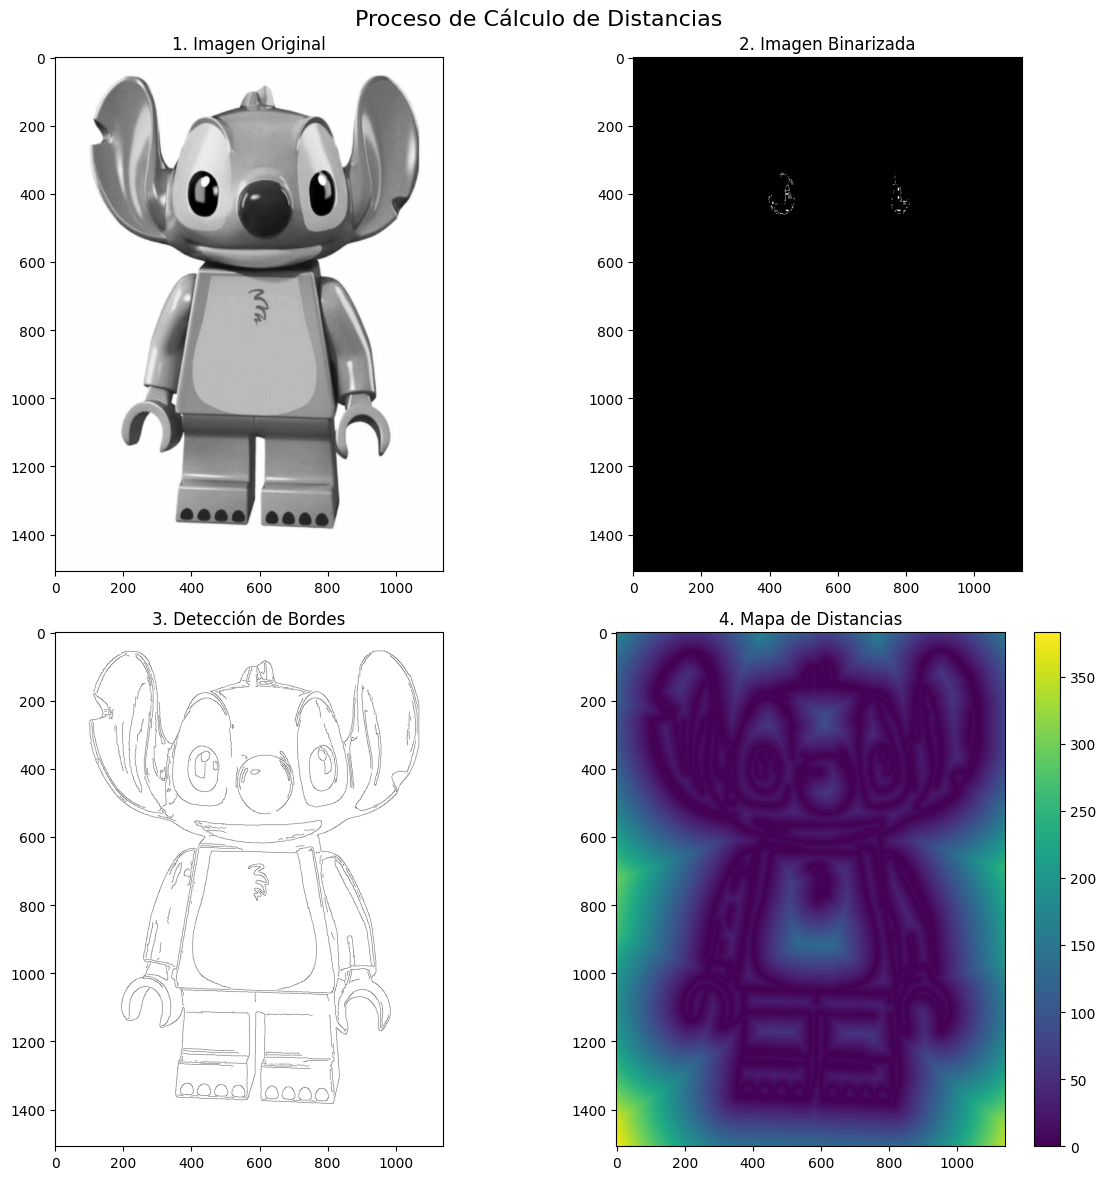

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion
import cv2

def proceso_completo(imagen, umbral=0.5):
    """
    Proceso completo desde imagen hasta mapa de distancias
    """
    # 1. Convertir a escala de grises si es necesario
    if len(imagen.shape) == 3:
        gris = rgb2gray(imagen)  # Convertir a escala de grises
    else:
        gris = imagen

    # 2. Binarizar la imagen (convertir a blanco y negro)
    binaria = gris > umbral

    # 3. Detectar bordes (usando Sobel)
    bordes = feature.canny(gris)

    # 4. Calcular distancias desde el borde
    distancias = distance_transform_edt(~bordes)

    # Visualizar todos los pasos
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle('Proceso de Cálculo de Distancias', fontsize=16)

    # Original
    axes[0, 0].imshow(imagen if len(imagen.shape) == 3 else gris, cmap='gray')
    axes[0, 0].set_title('1. Imagen Original')

    # Binaria
    axes[0, 1].imshow(binaria, cmap='binary')
    axes[0, 1].set_title('2. Imagen Binarizada')

    # Bordes
    axes[1, 0].imshow(bordes, cmap='binary')
    axes[1, 0].set_title('3. Detección de Bordes')

    # Mapa de distancias
    im_dist = axes[1, 1].imshow(distancias, cmap='viridis')
    axes[1, 1].set_title('4. Mapa de Distancias')
    plt.colorbar(im_dist, ax=axes[1, 1])

    plt.tight_layout()
    return distancias, bordes

# Cargar imagen desde un archivo (reemplaza la ruta por la correcta en tu computadora)
def cargar_imagen(ruta_imagen):
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen desde {ruta_imagen}")
    return imagen

# Ejecutar el ejemplo con una imagen propia
try:
    imagen_path = 'STITCH.jpg'  # Cambia esto por la ruta de tu imagen
    imagen_cargada = cargar_imagen(imagen_path)
    distancias, bordes = proceso_completo(imagen_cargada)
    plt.show()
except Exception as e:
    print(e)



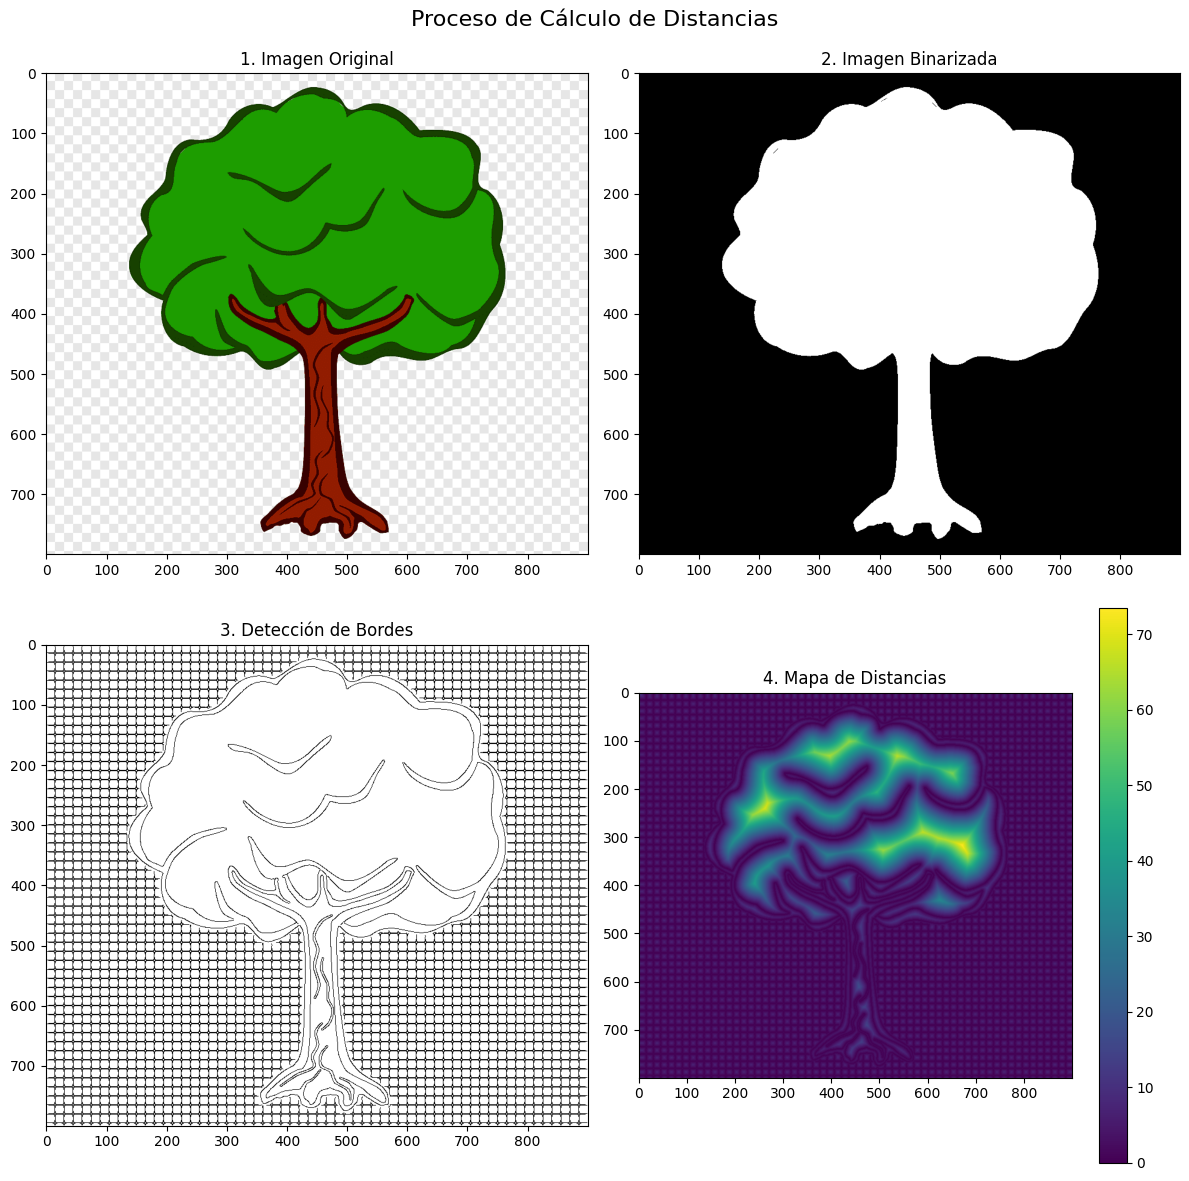

In [2]:
imagen = io.imread('ARBOL.png')
distancias, bordes = proceso_completo(imagen)

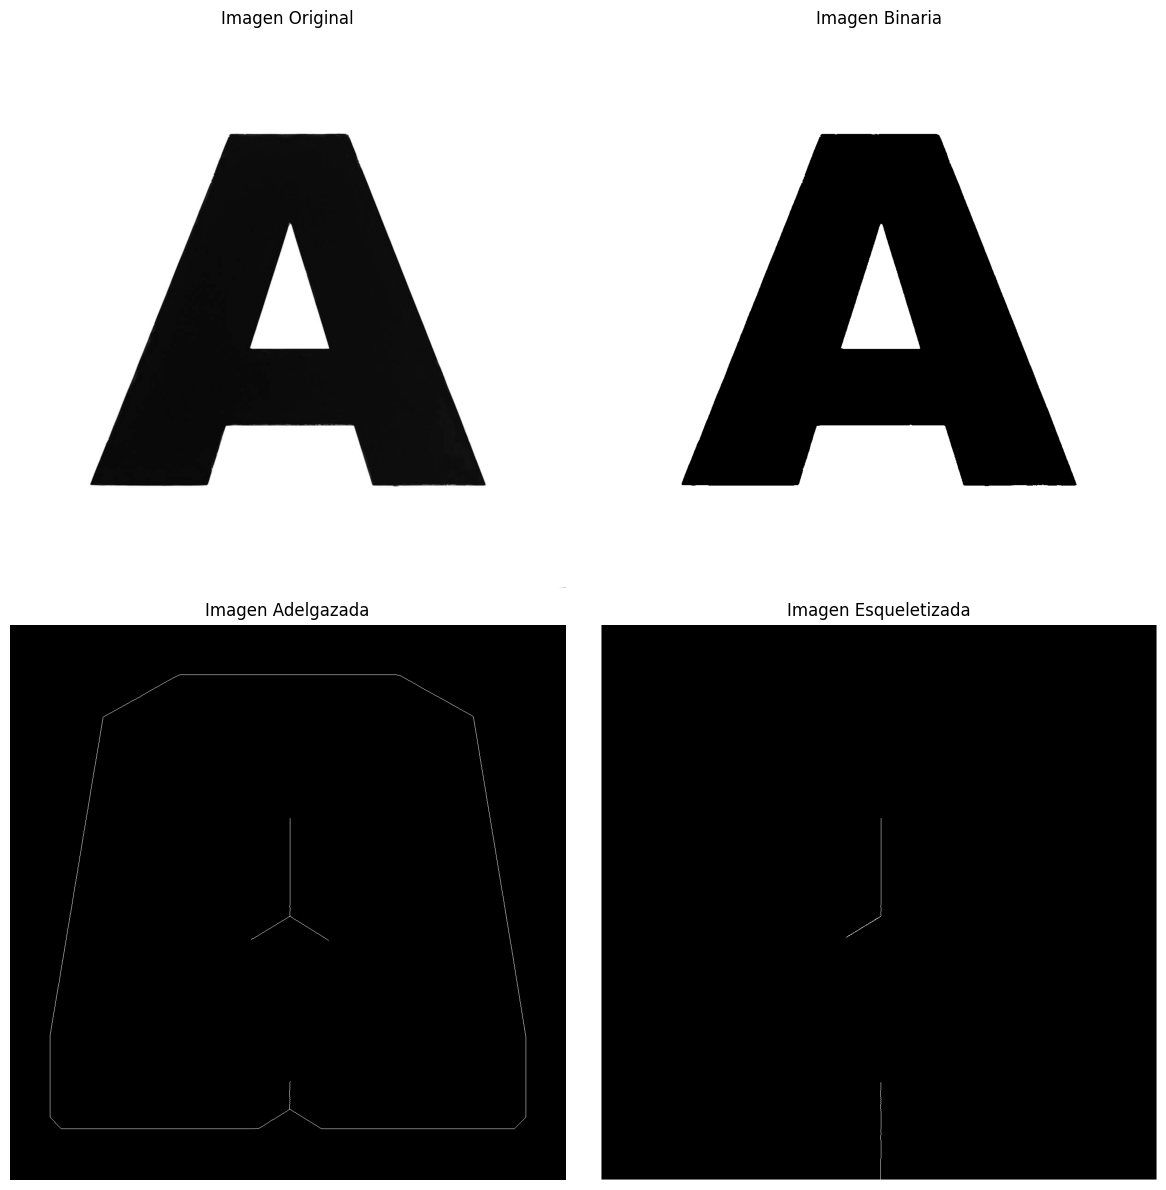

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import io
from skimage.color import rgb2gray

# Función de adelgazamiento
def adelgazamiento(imagen_binaria):
    # Realizar adelgazamiento utilizando un operador de esqueletización
    imagen_adelgazada = morphology.skeletonize(imagen_binaria)
    return imagen_adelgazada

# Función de esqueletización
def esqueletizacion(imagen_binaria):
    # Esqueletización usando OpenCV (es similar al adelgazamiento, pero el resultado es aún más fino)
    imagen_esqueletizada = cv2.ximgproc.thinning(imagen_binaria.astype(np.uint8))
    return imagen_esqueletizada

# Cargar la imagen (ajustar la ruta según tu archivo)
def cargar_imagen(ruta_imagen):
    imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if imagen is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen desde {ruta_imagen}")
    return imagen

# Preprocesamiento de la imagen (binarización)
def preprocesar_imagen(imagen):
    # Binarizar la imagen (umbral fijo)
    _, binaria = cv2.threshold(imagen, 128, 255, cv2.THRESH_BINARY)
    return binaria

# Mostrar los resultados
def mostrar_resultados(imagen_original, imagen_binaria, imagen_adelgazada, imagen_esqueletizada):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes[0, 0].imshow(imagen_original, cmap='gray')
    axes[0, 0].set_title('Imagen Original')
    
    axes[0, 1].imshow(imagen_binaria, cmap='gray')
    axes[0, 1].set_title('Imagen Binaria')
    
    axes[1, 0].imshow(imagen_adelgazada, cmap='gray')
    axes[1, 0].set_title('Imagen Adelgazada')
    
    axes[1, 1].imshow(imagen_esqueletizada, cmap='gray')
    axes[1, 1].set_title('Imagen Esqueletizada')

    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Ejecutar el proceso en una imagen
def procesar_imagen(ruta_imagen):
    imagen = cargar_imagen(ruta_imagen)
    
    # Binarizar la imagen
    imagen_binaria = preprocesar_imagen(imagen)
    
    # Aplicar adelgazamiento y esqueletización
    imagen_adelgazada = adelgazamiento(imagen_binaria)
    imagen_esqueletizada = esqueletizacion(imagen_binaria)

    # Mostrar los resultados
    mostrar_resultados(imagen, imagen_binaria, imagen_adelgazada, imagen_esqueletizada)

# Ruta de la imagen
imagen_path = 'A.jpg'  # Cambia la ruta por la imagen que deseas usar
procesar_imagen(imagen_path)


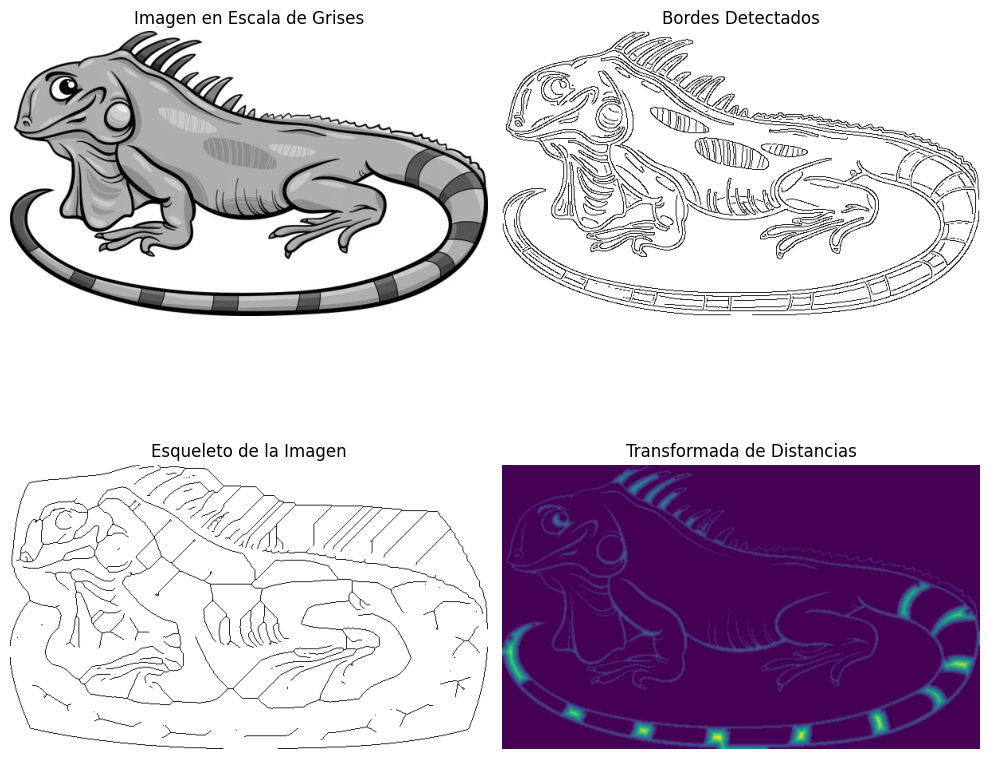

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature, morphology, filters, color
from scipy.ndimage import distance_transform_edt

# Cargar la imagen
imagen = io.imread('iguana.jpg')

# Convertir a escala de grises si es RGB
if imagen.ndim == 3:
    imagen_gray = color.rgb2gray(imagen)
else:
    imagen_gray = imagen

# Aplicar umbral de Otsu para binarizar
umbral_otsu = filters.threshold_otsu(imagen_gray)
imagen_bin = imagen_gray > umbral_otsu

# 1. Detectar bordes usando el operador Canny
bordes = feature.canny(imagen_gray)

# 2. Aplicar esqueletización (sobre binaria)
esqueleto = morphology.skeletonize(imagen_bin)

# 3. Calcular la transformada de distancias (sobre binaria invertida)
distancias = distance_transform_edt(~imagen_bin)

# Visualizar los resultados
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(imagen_gray, cmap='gray')
axes[0, 0].set_title('Imagen en Escala de Grises')
axes[0, 1].imshow(bordes, cmap='binary')
axes[0, 1].set_title('Bordes Detectados')
axes[1, 0].imshow(esqueleto, cmap='binary')
axes[1, 0].set_title('Esqueleto de la Imagen')
axes[1, 1].imshow(distancias, cmap='viridis')
axes[1, 1].set_title('Transformada de Distancias')

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()
